## GP linear regression without noise

In [56]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import scipy
# Define the kernel
def kernel(xa, xb):
    # L2 distance (Squared Euclidian)
    #ker = the0 * np.exp(-0.5 * the1 *distance.cdist(xa, xb, 'sqeuclidean')) + the2 + the3* xa * xb
    ker = np.exp(-0.5 *distance.cdist(xa, xb, 'sqeuclidean'))
    return ker

nb_of_samples = 100  
number_of_functions = 5  # Number of functions to sample
the0, the1, the2, the3 = 1, 64, 0 ,0
# Independent variable samples
X = np.expand_dims(np.linspace(-1, 1, nb_of_samples), 1)
sigma = kernel(X, X)  # Kernel of data points
assert sigma.shape == (nb_of_samples,nb_of_samples)

In [23]:
def GP(X1, y1, X2, kernel_func):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1), 
    and the prior kernel function.
    """
    the0, the1, the2, the3 = 1, 64, 0 ,0
    # Kernel of the observations
    sig11 = kernel_func(X1, X1)
    # Kernel of observations vs to-predict
    sig12 = kernel_func(X1, X2)
    print(sig11.shape)
    print(sig12.shape)
    # Solve
    solved = scipy.linalg.solve(sig11, sig12, assume_a='pos').T
    
    print(solved.shape)
    # Compute posterior mean
    mu2 = solved @ y1
    # Compute the posterior covariance
    sig22 = kernel_func(X2, X2)
    sig2 = sig22 - (solved @ sig12)
    return mu2, sig2  # mean, covariance

In [24]:
# true function
f_sin = lambda x: (np.sin(x)).flatten()

In [49]:
n1 = 8  # Number of points to condition on (training points)
n2 = 50  # Number of points in posterior (test points)
ny = 5  # Number of functions that will be sampled from the posterior
domain = (-6, 6)

# Sample observations (X1, y1) on the function
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=(n1,1))
y1 = f_sin(X1)
# Predict points at uniform spacing to capture function
X2 = np.linspace(domain[0], domain[1], n2).reshape(-1,1)
# Compute posterior mean and covariance
mu2, sig2 = GP(X1, y1, X2, kernel)
# Compute the standard deviation at the test points to be plotted
σ2 = np.sqrt(np.diag(sig2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=mu2, cov=sig2, size=ny)

(8, 8)
(8, 50)
(50, 8)


Text(0.5,-0.25,'the blue dots are in X1, the uncertainty shown in the area where X1 do not cover')

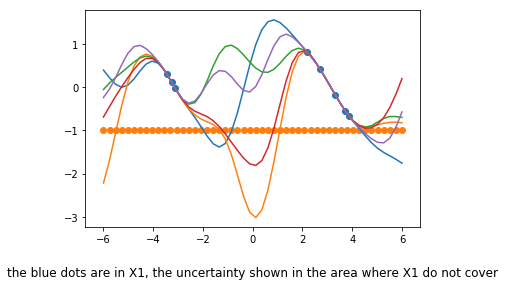

In [50]:
plt.plot(X2,y2[0,:])
plt.plot(X2,y2[1,:])
plt.plot(X2,y2[2,:])
plt.plot(X2,y2[3,:])
plt.plot(X2,y2[4,:])
plt.scatter(X1,f_sin(X1))
plt.scatter(X2, np.zeros(n2)-1)
plt.title('the blue dots are in X1, the uncertainty shown in the area where X1 do not cover',y=-0.25)

## GP linear regression with noise

Σ
11
=
k
(
X
1
,
X
1
)
+
σ
2
ϵ
I

In [58]:
def GP_noise(X1, y1, X2, kernel_func,std_noise):
    #
    #the0, the1, the2, the3 = 1, 64, 0 ,0
    # Kernel of the observations
    sig11 = kernel_func(X1, X1) + np.eye(n1)* std_noise
    # Kernel of observations vs to-predict
    sig12 = kernel_func(X1, X2) 
    print(sig11.shape)
    print(sig12.shape)
    # Solve
    solved = scipy.linalg.solve(sig11, sig12, assume_a='pos').T
    
    print(solved.shape)
    # Compute posterior mean
    mu2 = solved @ y1
    # Compute the posterior covariance
    sig22 = kernel_func(X2, X2)
    sig2 = sig22 - (solved @ sig12)
    return mu2, sig2  # mean, covariance

In [66]:
# Compute posterior mean and covariance
std_noise = 0.05
mu2_noise, sig2_noise = GP_noise(X1, y1, X2, kernel,std_noise)
# Compute the standard deviation at the test points to be plotted
#σ2 = np.sqrt(np.diag(sig2))

# Draw some samples of the posterior
y2_noise = np.random.multivariate_normal(mean=mu2_noise, cov=sig2_noise, size=ny)

(8, 8)
(8, 50)
(50, 8)


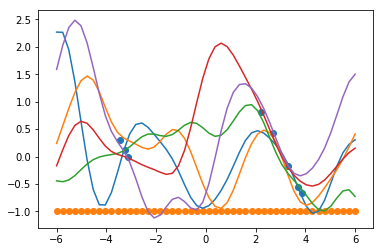

In [67]:
plt.plot(X2,y2_noise[0,:])
plt.plot(X2,y2_noise[1,:])
plt.plot(X2,y2_noise[2,:])
plt.plot(X2,y2_noise[3,:])
plt.plot(X2,y2_noise[4,:])
plt.scatter(X1,f_sin(X1))
plt.scatter(X2, np.zeros(n2)-1)